In [1]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Load the pre-trained VGG19 model
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [3]:
# Freeze all layers in the pre-trained model
for layer in vgg19.layers:
    layer.trainable = False

In [4]:
num_classes = 15
batch_size = 16
num_epochs = 10

In [5]:
# Add new fully connected layers for your own classification task
x = Flatten()(vgg19.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [6]:
# Create the final model with the new layers on top of the pre-trained model
model = Model(inputs=vgg19.input, outputs=predictions)

In [7]:
# Compile the model
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Train only the last few layers of the model with your own data
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        'split_data/train/',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')

Found 5536 images belonging to 15 classes.


In [9]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
        'split_data/val',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')

Found 686 images belonging to 15 classes.


In [22]:
history = model.fit(
        train_generator,
        epochs=num_epochs,
        validation_data=validation_generator)

Epoch 1/10
346/346 [==============================] - 969s 3s/step - loss: 2.1419 - accuracy: 0.2464 - val_loss: 1.9948 - val_accuracy: 0.2391
Epoch 2/10
346/346 [==============================] - 914s 3s/step - loss: 1.9416 - accuracy: 0.2878 - val_loss: 1.8731 - val_accuracy: 0.3047
Epoch 3/10
346/346 [==============================] - 905s 3s/step - loss: 1.8679 - accuracy: 0.3145 - val_loss: 1.8210 - val_accuracy: 0.3615
Epoch 4/10
346/346 [==============================] - 925s 3s/step - loss: 1.7639 - accuracy: 0.3680 - val_loss: 1.8144 - val_accuracy: 0.3586
Epoch 5/10
346/346 [==============================] - 902s 3s/step - loss: 1.6791 - accuracy: 0.4082 - val_loss: 1.6640 - val_accuracy: 0.4198
Epoch 6/10
346/346 [==============================] - 904s 3s/step - loss: 1.5986 - accuracy: 0.4238 - val_loss: 1.5827 - val_accuracy: 0.4169
Epoch 7/10
346/346 [==============================] - 917s 3s/step - loss: 1.6105 - accuracy: 0.4202 - val_loss: 1.5883 - val_accuracy: 0.4563

In [24]:
# Load the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    "split_data/test",
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('Test accuracy:', test_acc)

Found 706 images belonging to 15 classes.
45/45 - 104s - loss: 1.5437 - accuracy: 0.4363 - 104s/epoch - 2s/step
Test accuracy: 0.4362606108188629


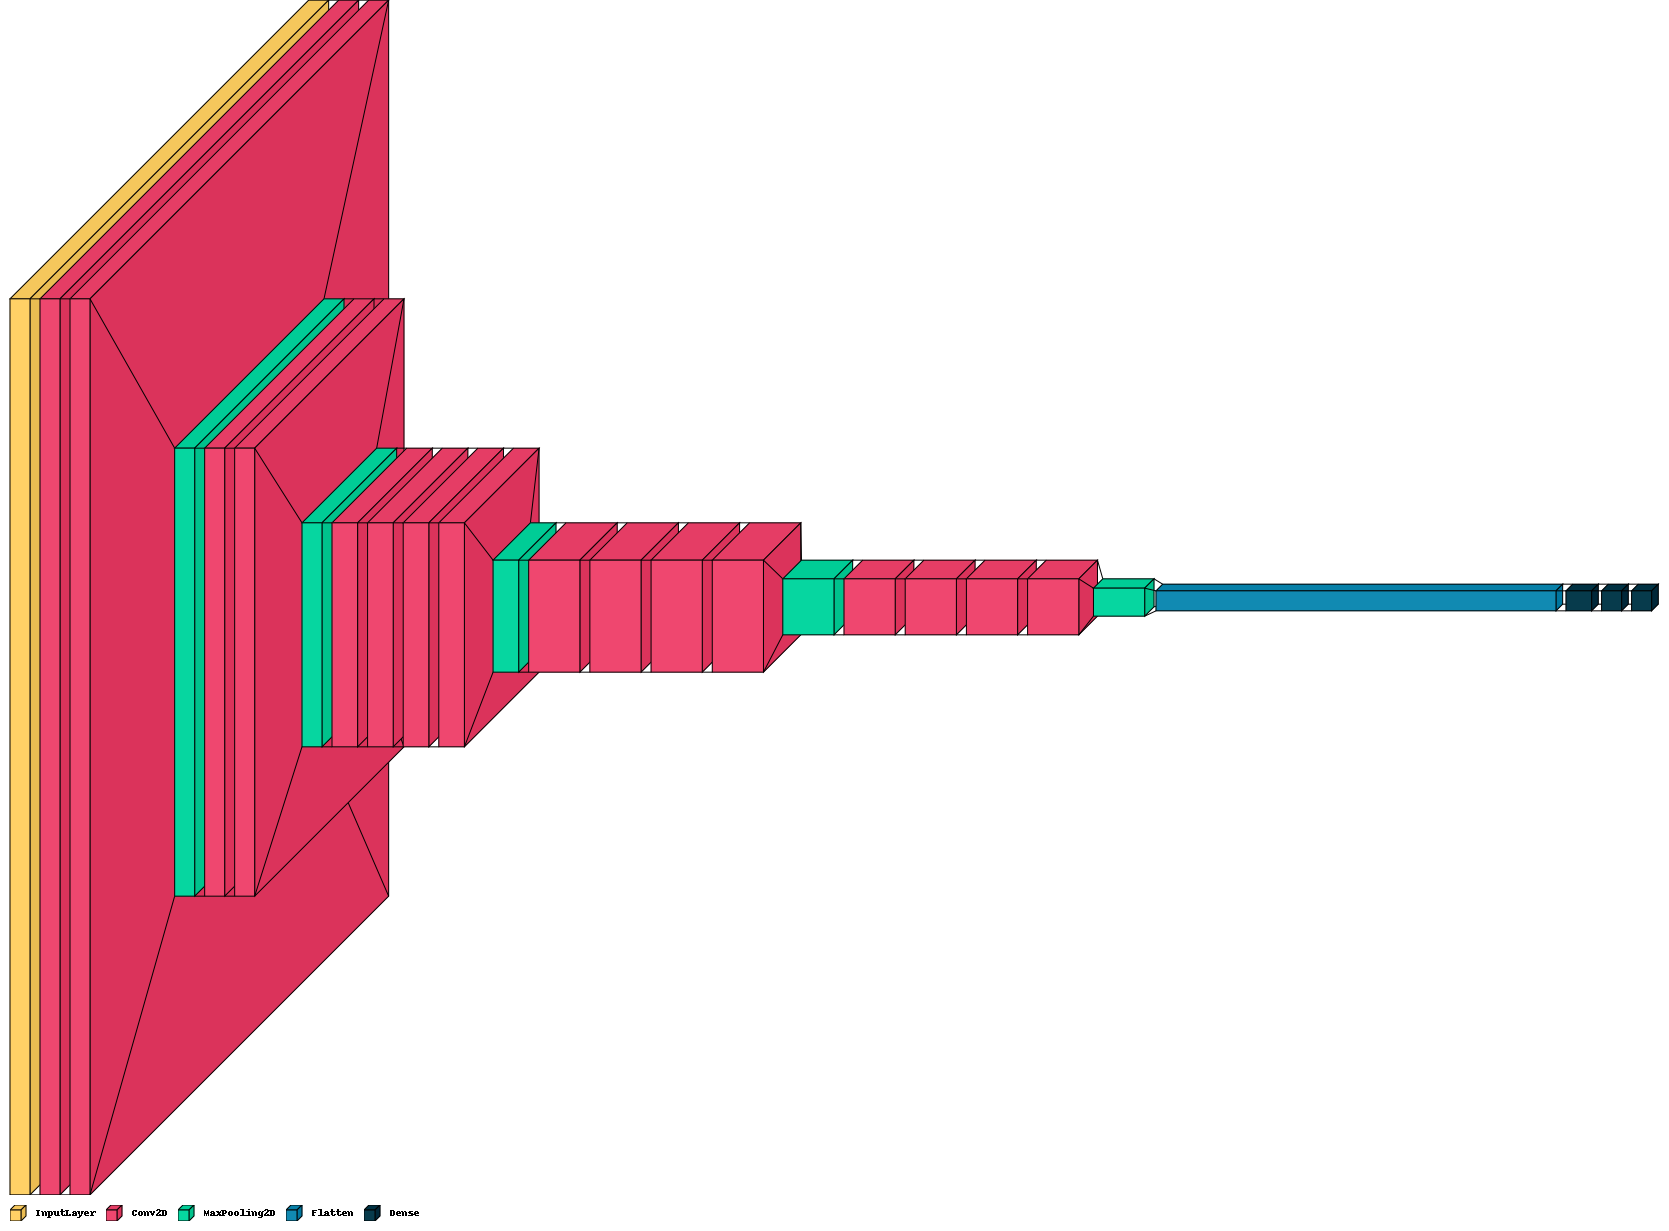

In [10]:
import visualkeras
from keras_visualizer import visualizer 

visualkeras.layered_view(model, legend=True) 